In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

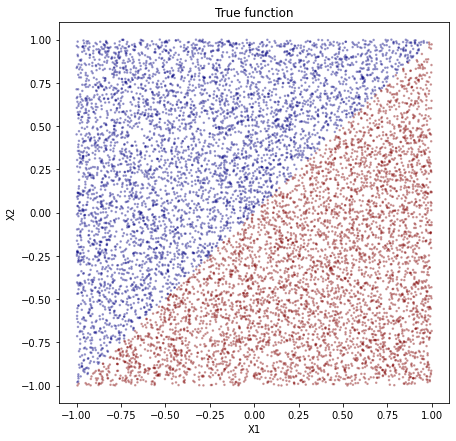

In [2]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0] - X[:,1])
y = f + np.random.normal(size=n)
fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('True function')

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = np.empty(len(tree_depth))

from tqdm import tqdm
for d in tqdm(tree_depth):
    res=[]
    rtree = DecisionTreeRegressor(max_depth=d)
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X,
                                    y, train_size=500)
        tree=rtree.fit(X_train, y_train)
        prediction=tree.predict(X_test)
        residual_sum=np.mean((prediction-y_test)**2)
        res.append(residual_sum)
    
    test_mean_squared_error[d-1]=np.mean(res)
    
        
fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

  0%|                                                     | 0/7 [00:00<?, ?it/s]

The best depth appears to be 4. The mean squared error decreases from 1 to 4, and begins to increase again from 4 to 7, so 4 is optimal. 

If the regression tree were trained on 5000 points, the optimal choice of depth would increase. As the number of training points increases our training data becomes more representative of the test set and thus is less likely to overfit and we can afford to have a deeper tree. Another way to look at this is that a set of 5000 points is less affected by removing one point than a set of 500, thus with more training samples we have smaller variance, are less likely to overfit and can afford a deeper tree. 

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    temp_array=np.zeros(n)
    other_temp_array=np.zeros(n)
    for i in range(0,trials):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                        y, train_size = trials)
        tree = rtree.fit(X_train, y_train)
        pred = tree.predict(X)
        temp_array=temp_array + pred 
        other_temp_array=other_temp_array+pred**2
        E_yhat=temp_array * (1/trials)
        E_yhat_squared=other_temp_array* (1/trials)
         
        
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))
    
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

(a)The plot of squared bias and variance makes sense because a deeper tree has higher variance and lower bias, while a shallow tree has higher bias and lower variance. For a deeper tree (an extreme example is an overfit tree) our predictions will be very close to the real value (low bias), however if we were to repeat the experiment multiple times on different data our prediction would change by a lot (high variance). The opposite is true for a shallow tree. Is it difficult to get accurate predictions (high bias). However, if we ran it multiple times, we would get similar predictions (low variance). The plot for MSE makes sense given the plot for squared bias and variance because MSE is bias squared plus variance, so in the middle both (around 4) both values are low, and either bias or variance increases in either direction, increasing the MSE. 
 
(b) The approximate value of the difference between MSE and the sum of squared bias and variance is one because it is the variance of the noise we added to our data. 


In [ ]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')

plt.ylabel('X2')
_ = plt.title('A new true function')

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = np.empty(len(tree_depth))

from tqdm import tqdm
for d in tqdm(tree_depth):
    res=[]
    rtree = DecisionTreeRegressor(max_depth=d)
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                        y, train_size=500)
        tree=rtree.fit(X_train, y_train)
        prediction=tree.predict(X_test)
        residual_sum=np.mean((prediction-y_test)**2)
        res.append(residual_sum)
    
    test_mean_squared_error[d-1]=np.mean(res)
    
        
fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

According to the plot above the best depth is one. The is because the first split would split the dataset nearly perfectly down the middle (into two rectangles) and any additional nodes would simply pick up on the noise that we added to the dataset. This is different than for the diagonal split, since there is no way to split that data using a single rectangular cut. 

If the regression tree was trained on 5000 data points the results would not chance, one would still be the optimal depth. The first "cut" would split the data optimally and no additiional nodes are needed. 

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    temp_array=np.zeros(n)
    other_temp_array=np.zeros(n)
    for i in range(0,trials):
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                        y, train_size = trials)
        tree = rtree.fit(X_train, y_train)
        pred = tree.predict(X)
        temp_array=temp_array + pred 
        other_temp_array=other_temp_array+pred**2
        E_yhat=temp_array * (1/trials)
        E_yhat_squared=other_temp_array* (1/trials)
        
        
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))
    
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

The plot of squared bias and variance make sense because the first split is optimal and any further splitting increases the bias and the variance in the data. Since MSE is squared bias plus variance, it is logical that the MSE also increases. 

By the same reasoning as for the previous example, the difference between the MSE and the sum of squared bias and variance for this data is one. 

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes_x = diabetes.data
diabetes_y = diabetes.target
print(diabetes.DESCR)

In [ ]:


bmi = diabetes_x[:,2]
s5 = diabetes_x[:,8]
rss_bmi = []
rss_s5 = []


def average(x):
    if len(x) == 0:
        return(0.0)
    else:
        return(np.mean(x))


for i in range(len(bmi)):
    left = np.where(bmi <= bmi[i])[0]
    right = np.where(bmi > bmi[i])[0]
    rss_bmi.append(np.sum((diabetes_y[left] - \
                average(diabetes_y[left]))**2) + 
                   np.sum((diabetes_y[right] - \
                    average(diabetes_y[right]))**2))
    left = np.where(s5 <= s5[i])[0]
    right = np.where(s5 > s5[i])[0]
    rss_s5.append(np.sum((diabetes_y[left] - \
            average(diabetes_y[left]))**2) + 
                  np.sum((diabetes_y[right] -\
            average(diabetes_y[right]))**2))
    


#ROOT NODE

if np.min(rss_bmi)<np.min(rss_s5):
    print("First split should be done using bmi")
        
else: 
    print("First split should be done using s5")

best_bmi_cut_index = np.argmin(rss_bmi)
best_s5_cut_index = np.argmin(rss_s5)


indicesleft=np.where(s5 <= s5[best_s5_cut_index])
indicesright=np.where(s5 > s5[best_s5_cut_index])
    
    
group1=diabetes_y[indicesleft]
bmigroup1=bmi[indicesleft]
s5group1=s5[indicesleft]
group2=diabetes_y[indicesright]
bmigroup2=bmi[indicesright]
s5group2=s5[indicesright]

#SPLITTING GROUP 1 USING s5
rss_bmi1 = []
rss_s51 = []
for i in range(len(group1)):
    left = np.where(bmigroup1 <= bmigroup1[i])[0]
    right = np.where(bmigroup1 > bmigroup1[i])[0]
    rss_bmi1.append(np.sum((group1[left] - average\
        (group1[left]))**2) + np.sum((group1[right] -\
                            average(group1[right]))**2))
    left = np.where(s5group1 <= s5group1[i])[0]
    right = np.where(s5group1 > s5group1[i])[0]
    rss_s51.append(np.sum((group1[left] - average(\
        group1[left]))**2) + np.sum((group1[right] - \
                            average(group1[right]))**2))

if np.min(rss_bmi1)<np.min(rss_s51):
    print("Second split should be done using bmi")
else: 
    print("Second split should be done using s5")

#SPLITTING GROUP 2 USING BMI
rss_bmi2 = []
rss_s52 = []
for i in range(len(bmigroup2)):
    left = np.where(bmigroup2 <= bmigroup2[i])[0]
    right = np.where(bmigroup2 > bmigroup2[i])[0]
    rss_bmi2.append(np.sum((group2[left] - average(\
                    group2[left]))**2) + np.sum((group2[right]\
                                    - average(group2[right]))**2))
    left = np.where(s5group2 <= s5group2[i])[0]
    right = np.where(s5group2 > s5group2[i])[0]
    rss_s52.append(np.sum((group2[left] - average(group2[left]))**2)\
            + np.sum((group2[right] - average(group2[right]))**2))

if np.min(rss_bmi2)<np.min(rss_s52):
    print("Third split should be done using bmi")


else: 
    print("Third split should be done using s5")




Here is some starter code that you can use to show the four rectangles defined by the leaves. Modify this to use the regions defined by the decision tree above.

In [ ]:
plt.scatter(bmi, s5, c = diabetes_y)
plt.ylabel("S5", fontsize=14)
plt.xlabel("BMI", fontsize=14)
plt.hlines(s5[np.argmin(rss_s5)], xmin=np.min(bmi), \
           xmax=np.max(bmi), colors='r')
plt.vlines(bmigroup1[np.argmin(rss_bmi1)], \
        ymin=np.min(s5), ymax=s5[np.argmin(rss_s5)], colors='r')
plt.vlines(bmigroup2[np.argmin(rss_bmi2)], \
        ymin=s5[np.argmin(rss_s5)], ymax=np.max(s5), colors='r')
plt.show()


### 2.2 Fitting a full regression tree

Now build a tree that uses all the predictor variables, has a more flexible structure, and is validated with a test set. Split the full dataset into a training set and a test set of equal size (50/50). Fit a regression tree to the training set using the function `DecisionTreeRegressor` from `sklearn.tree`. For now, use your best judgment to choose parameters for tree complexity; we will use cross-validation to choose parameters in later parts of this problem set. Some starter code is provided:

In [ ]:
from sklearn import tree


X_train, X_test, y_train, y_test = train_test_split(diabetes_x, \
                                        diabetes_y, train_size=.5)


regr = tree.DecisionTreeRegressor(max_depth=3).fit(X_train, y_train) 
# tree parameters go inside the first set of parentheses and the
# training data goes in the second set of parenthases. Check the 
# documentation for details.



In [ ]:
trials=500
tree_depth = np.arange(1, 8)
test_mean_squared_error = np.empty(len(tree_depth))

from tqdm import tqdm
for d in tqdm(tree_depth):
    res=[]
    regr1 = DecisionTreeRegressor(max_depth=d, random_state=50)
    for trial in np.arange(trials):
        X_train, X_test, y_train, y_test = train_test_split\
            (diabetes_x, diabetes_y, train_size=0.5)
        trees=regr1.fit(X_train, y_train)
        prediction=trees.predict(X_test)
        residual_sum=np.mean((prediction-y_test)**2)
        res.append(residual_sum)
    
    test_mean_squared_error[d-1]=np.mean(res)

fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

### 2.3 Plotting the tree

Plot your regression tree. To do so, just execute the cell below; no
need to modify it.



In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True, \
                feature_names=diabetes.feature_names)


### 2.4 Evaluation

Interpret your regression tree. What are some examples of variables that seem to correspond to higher or lower measures of diabetes progression? What is the MSE of the model using the test set? The `.predict` method for your model can help with this.

In [ ]:
pred_y = regr.predict(X_test)
mse = np.mean((y_test-pred_y)**2)
mse
 

After running the tree several times it seems that bmi, s5, s3 and np seem to correspond to higher or lower measures of diabetes progression.

### 2.5 Using random forests

Finally, we will grow random forests to analyze the data,
using the `RandomForestRegressor` function from `sklearn.ensemble`. Again, please use your best judgment to choose the initial parameters for tree complexity.



In [ ]:
from sklearn import ensemble

# Here is an example of how to use the random forest function in sklearn.ensemble.
# The code below assumes that the training inputs and responses are loaded in the variables train_x and train_y
# and that the test predictor variables are in test_x

dtr = ensemble.RandomForestRegressor\
    (min_samples_leaf=15, max_features=10)
forestregr = dtr.fit(X_train, y_train)
pred_y = regr.predict(X_test)
mse = np.mean(np.square(y_test-pred_y))
mse
 


Answer the following questions to compare the performance of random forests to a single regression tree.

1. What test MSE do you obtain, and how does it compare to the test MSE of the regression tree above? 

1. According to the model, which variables are most important in predicting diabetes progression? (The `.feature_importances_` method of the model may help with this.)

1. Plot the MSE of the prediction against $m$, the number of variables considered at each split.

1. Comment on the plot you created and if it makes sense.

1. The test MSE I obtained for the random forest is 2971.116. This is lower than the MSE for the regression tree above. This is logical because running a forest model is intended to lower the variance of the result and reduce MSE. 
2. The most important variables in predicting diabetes progression seem to be "bmi", "s5", "np" and "s3". 
4. The plot I created makes sense. Every time you run a forest, each tree in the forest uses the given number of features to make its prediction. Using too few features would give poor predictions, increasing the bias and MSE, but too many features we may increase the variance by failing to decorrelate the variables. Thus the optimal amount is around four. 

In [ ]:
## Write your answers here, using a mix of Markdown and code, as appropriate.
importances = forestregr.feature_importances_
new_vars=[]
variables = ['age', 'sex', 'bmi', 'bp', 's1', 's2',\
            's3', 's4', 's5', 's6']
indices=np.argsort(importances)[::-1]
for i in indices:
    new_vars.append(variables[i])
importances=importances[indices]
plt.bar(new_vars, importances)

In [ ]:
num_variables_used=np.arange(1,11)
mse=[]
for i in range(1,11):
    dtr = ensemble.RandomForestRegressor(min_samples_leaf=15, \
                                        max_features=i)
    forestregr = dtr.fit(X_train, y_train)
    pred_y = forestregr.predict(X_test)
    mse.append(np.mean(np.square(y_test-pred_y)))
plt.plot(num_variables_used, mse)